In [1]:
!pip install tqdm
!pip install tensorflow
!pip install tensorflow numpy matplotlib
!pip install tensorflow tensorflow-hub numpy matplotlib

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tqdm
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


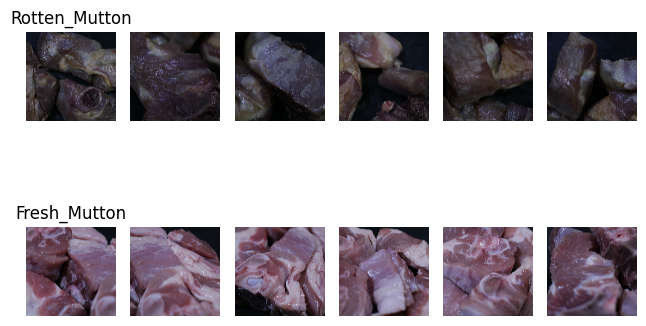

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your dataset directory
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Mutton"

# Define the image file extension as '.JPG'
image_extension = '.JPG'

# Define the number of sample images to visualize per class
num_samples_per_class = 6

# Create a list to store sample image paths
sample_image_paths = []

# Get a list of class folders
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define the number of columns for subplots
num_columns = num_samples_per_class

# Iterate through class folders
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.endswith(image_extension)]

    if not image_files:
        continue  # Skip empty folders

    # Randomly select 6 images for visualization
    sample_images = random.sample(image_files, min(num_samples_per_class, len(image_files)))

    sample_image_paths.extend([os.path.join(class_path, img) for img in sample_images])

# Calculate the number of rows required
num_rows = (len(sample_image_paths) + num_columns - 1) // num_columns

# Visualize sample images with class names
for i, image_path in enumerate(sample_image_paths, start=1):
    plt.subplot(num_rows, num_columns, i)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

    if i % num_columns == 1:
        plt.title(class_folders[i // num_columns])

plt.tight_layout()
plt.show()


Found 419 images belonging to 2 classes.
Number of classes: 2
Class labels: {'Fresh_Mutton': 0, 'Rotten_Mutton': 1}
Number of images per class:
Rotten_Mutton: 213 images
Fresh_Mutton: 206 images


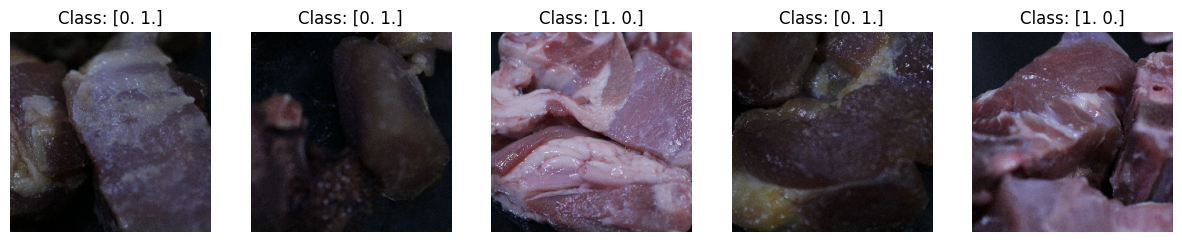

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Mutton"

# Create an ImageDataGenerator for loading and preprocessing images
image_data_generator = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images from a directory
image_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(256, 256),  # Set your desired target size
    batch_size=32,           # Set your desired batch size
    class_mode='categorical'  # Set the class mode based on your dataset
)

# Display some details about the loaded dataset
print("Number of classes:", len(image_dataset.class_indices))
print("Class labels:", image_dataset.class_indices)

# Count the number of images per class
class_image_counts = {class_label: len(os.listdir(os.path.join(dataset_path, class_label)))
                      for class_label in os.listdir(dataset_path)}
print("Number of images per class:")
for class_label, count in class_image_counts.items():
    print(f"{class_label}: {count} images")

# Display a few sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    image, label = image_dataset.next()
    axes[i].imshow(image[0])
    axes[i].axis('off')
    axes[i].set_title(f"Class: {label[0]}")

plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Mutton"
output_folder = "/content/drive/MyDrive/Split dataset Mutton Quality Classification"

# Create output folders for train and test sets
train_folder = os.path.join(output_folder, "train")
test_folder = os.path.join(output_folder, "test")
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Loop through each class folder
for class_name in tqdm(os.listdir(dataset_path), desc="Processing classes"):
    class_path = os.path.join(dataset_path, class_name)

    # Skip non-directory entries
    if not os.path.isdir(class_path):
        continue

    # Get a list of all images in the class folder with .jpg or .JPG extension
    images = [img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))]

    # Print the list of images for each class
    print(f"Class '{class_name}' has {len(images)} image(s): {images}")

    # Check if there are any images for the current class
    if not images:
        print(f"Skipping class '{class_name}' as it has no images.")
        continue

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Save images to the corresponding train and test folders
    for img in train_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(train_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

    for img in test_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(test_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

print("Dataset splitting and copying completed.")


Processing classes:   0%|          | 0/2 [00:00<?, ?it/s]

Class 'Rotten_Mutton' has 213 image(s): ['IMG_6772.JPG', 'IMG_6775.JPG', 'IMG_6773.JPG', 'IMG_6774.JPG', 'IMG_6771.JPG', 'IMG_6767.JPG', 'IMG_6761.JPG', 'IMG_6758.JPG', 'IMG_6763.JPG', 'IMG_6770.JPG', 'IMG_6747.JPG', 'IMG_6748.JPG', 'IMG_6769.JPG', 'IMG_6766.JPG', 'IMG_6752.JPG', 'IMG_6757.JPG', 'IMG_6750.JPG', 'IMG_6756.JPG', 'IMG_6753.JPG', 'IMG_6760.JPG', 'IMG_6762.JPG', 'IMG_6768.JPG', 'IMG_6759.JPG', 'IMG_6749.JPG', 'IMG_6765.JPG', 'IMG_6755.JPG', 'IMG_6754.JPG', 'IMG_6751.JPG', 'IMG_6764.JPG', 'IMG_6746.JPG', 'IMG_6724.JPG', 'IMG_6736.JPG', 'IMG_6745.JPG', 'IMG_6739.JPG', 'IMG_6737.JPG', 'IMG_6744.JPG', 'IMG_6727.JPG', 'IMG_6731.JPG', 'IMG_6728.JPG', 'IMG_6734.JPG', 'IMG_6740.JPG', 'IMG_6722.JPG', 'IMG_6729.JPG', 'IMG_6741.JPG', 'IMG_6742.JPG', 'IMG_6738.JPG', 'IMG_6733.JPG', 'IMG_6735.JPG', 'IMG_6726.JPG', 'IMG_6723.JPG', 'IMG_6743.JPG', 'IMG_6725.JPG', 'IMG_6730.JPG', 'IMG_6732.JPG', 'IMG_6716.JPG', 'IMG_6712.JPG', 'IMG_6704.JPG', 'IMG_6720.JPG', 'IMG_6702.JPG', 'IMG_6721.JPG',

Processing classes:  50%|█████     | 1/2 [00:17<00:17, 17.36s/it]

Class 'Fresh_Mutton' has 206 image(s): ['IMG_5041.JPG', 'IMG_5027.JPG', 'IMG_5051.JPG', 'IMG_5048.JPG', 'IMG_5054.JPG', 'IMG_5023.JPG', 'IMG_5035.JPG', 'IMG_5032.JPG', 'IMG_5046.JPG', 'IMG_5024.JPG', 'IMG_5031.JPG', 'IMG_5044.JPG', 'IMG_5029.JPG', 'IMG_5050.JPG', 'IMG_5028.JPG', 'IMG_5038.JPG', 'IMG_5026.JPG', 'IMG_5042.JPG', 'IMG_5037.JPG', 'IMG_5052.JPG', 'IMG_5043.JPG', 'IMG_5049.JPG', 'IMG_5030.JPG', 'IMG_5025.JPG', 'IMG_5039.JPG', 'IMG_5034.JPG', 'IMG_4999.JPG', 'IMG_5045.JPG', 'IMG_5020.JPG', 'IMG_5033.JPG', 'IMG_5007.JPG', 'IMG_5053.JPG', 'IMG_5003.JPG', 'IMG_5008.JPG', 'IMG_5021.JPG', 'IMG_5013.JPG', 'IMG_5004.JPG', 'IMG_5022.JPG', 'IMG_5016.JPG', 'IMG_5040.JPG', 'IMG_5036.JPG', 'IMG_5019.JPG', 'IMG_5017.JPG', 'IMG_5047.JPG', 'IMG_5012.JPG', 'IMG_5010.JPG', 'IMG_4994.JPG', 'IMG_4993.JPG', 'IMG_4998.JPG', 'IMG_5006.JPG', 'IMG_5018.JPG', 'IMG_5005.JPG', 'IMG_4995.JPG', 'IMG_5002.JPG', 'IMG_5011.JPG', 'IMG_5001.JPG', 'IMG_4997.JPG', 'IMG_4996.JPG', 'IMG_5000.JPG', 'IMG_5014.JPG', 

Processing classes: 100%|██████████| 2/2 [00:40<00:00, 20.01s/it]

Dataset splitting and copying completed.


In [ ]:
import os

# Replace this path with your split dataset path
split_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification"

# Dictionary to store the number of images per class
class_image_count = {}

# Loop through each class folder in the train set
for class_name in os.listdir(os.path.join(split_dataset_path, "train")):
    class_path = os.path.join(split_dataset_path, "train", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the train set
print("\nDiagnostic Report for Train Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")

# Reset the dictionary for the test set
class_image_count = {}

# Loop through each class folder in the test set
for class_name in os.listdir(os.path.join(split_dataset_path, "test")):
    class_path = os.path.join(split_dataset_path, "test", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the test set
print("\nDiagnostic Report for Test Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")



Diagnostic Report for Train Set:
Class 'Rotten_Mutton' has 170 image(s).
Class 'Fresh_Mutton' has 164 image(s).

Diagnostic Report for Test Set:
Class 'Rotten_Mutton' has 43 image(s).
Class 'Fresh_Mutton' has 42 image(s).


Model Training

#Mutton Quality Classification using DNN

Class: Rotten_Mutton, Number of images: 170
Class: Fresh_Mutton, Number of images: 164
Class: Rotten_Mutton, Number of images: 43
Class: Fresh_Mutton, Number of images: 42
Epoch 1/100
10/10 [==============================] - 8s 591ms/step - loss: 0.6661 - accuracy: 0.5125 - val_loss: 61.6852 - val_accuracy: 0.4941
Epoch 2/100
10/10 [==============================] - 5s 446ms/step - loss: 0.6418 - accuracy: 0.5099 - val_loss: 30.0392 - val_accuracy: 0.4941
Epoch 3/100
10/10 [==============================] - 6s 648ms/step - loss: 0.6401 - accuracy: 0.4868 - val_loss: 42.7876 - val_accuracy: 0.4941
Epoch 4/100
10/10 [==============================] - 5s 458ms/step - loss: 0.6192 - accuracy: 0.5033 - val_loss: 31.6303 - val_accuracy: 0.5059
Epoch 5/100
10/10 [==============================] - 5s 512ms/step - loss: 0.6101 - accuracy: 0.5298 - val_loss: 18.1795 - val_accuracy: 0.5882
Epoch 6/100
10/10 [==============================] - 5s 455ms/step - loss: 0.5929 - accuracy: 0.5497 - val_l

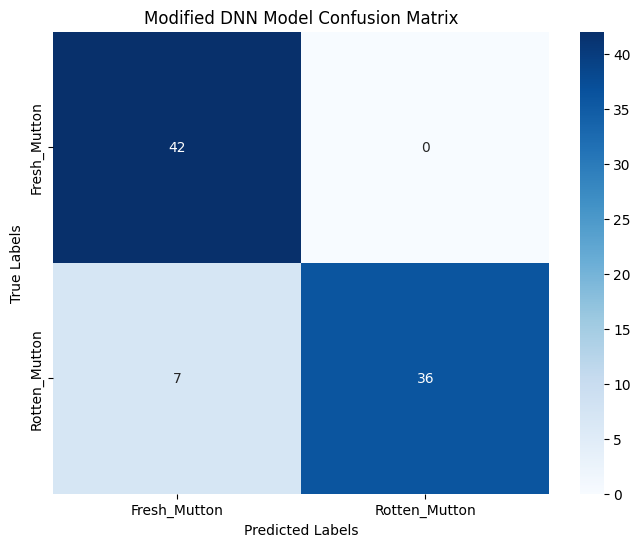

Modified DNN Model Classification Report:
               precision    recall  f1-score   support

 Fresh_Mutton       0.86      1.00      0.92        42
Rotten_Mutton       1.00      0.84      0.91        43

     accuracy                           0.92        85
    macro avg       0.93      0.92      0.92        85
 weighted avg       0.93      0.92      0.92        85



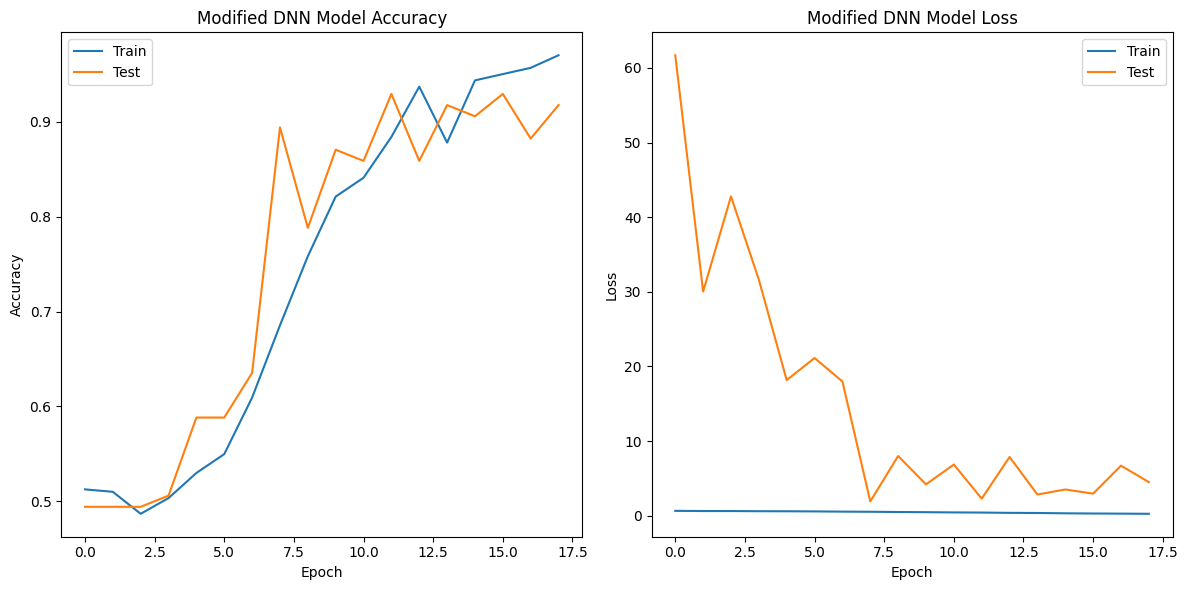

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    return data, labels_encoded, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/test"

train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path)
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path)

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Create a data generator for the training set
train_generator = datagen.flow(train_data, train_labels, batch_size=32, shuffle=True)

# Get the number of classes based on the unique labels in the training set
num_classes = len(np.unique(train_labels))

# Define the modified DNN model
dnn_model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Increasing dropout rate
    Dense(num_classes, activation='softmax')
])

# Compile the modified model with a smaller learning rate
dnn_model_modified.compile(optimizer=Adam(learning_rate=0.00001),  # Adjusted learning rate
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the modified DNN model with early stopping
dnn_history_modified = dnn_model_modified.fit(
    train_generator,
    steps_per_epoch=len(train_data) // 32,
    epochs=100,
    validation_data=(test_data, test_labels),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]  # Early stopping to prevent overfitting
)

# Evaluate the modified DNN model on the test set
dnn_test_loss_modified, dnn_test_acc_modified = dnn_model_modified.evaluate(test_data, test_labels)
print(f'Modified DNN Test Accuracy: {dnn_test_acc_modified}')

# Make predictions on the test set using the modified DNN model
dnn_predictions_modified = dnn_model_modified.predict(test_data)
dnn_predicted_labels_modified = np.argmax(dnn_predictions_modified, axis=1)

# Calculate confusion matrix for the modified DNN model
dnn_conf_matrix_modified = confusion_matrix(test_labels, dnn_predicted_labels_modified)

# Plot confusion matrix for the modified DNN model
plt.figure(figsize=(8, 6))
sns.heatmap(dnn_conf_matrix_modified, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Modified DNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score for the modified DNN model
dnn_report_modified = classification_report(test_labels, dnn_predicted_labels_modified, target_names=label_encoder.classes_)
print("Modified DNN Model Classification Report:")
print(dnn_report_modified)

# Plotting epoch-wise accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(dnn_history_modified.history['accuracy'], label='Train')
plt.plot(dnn_history_modified.history['val_accuracy'], label='Test')
plt.title('Modified DNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(dnn_history_modified.history['loss'], label='Train')
plt.plot(dnn_history_modified.history['val_loss'], label='Test')
plt.title('Modified DNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Class: Rotten_Mutton, Number of images: 170
Class: Fresh_Mutton, Number of images: 164
Class: Rotten_Mutton, Number of images: 43
Class: Fresh_Mutton, Number of images: 42
Epoch 1/100
10/10 [==============================] - 6s 426ms/step - loss: 0.6815 - accuracy: 0.4702 - val_loss: 48.5062 - val_accuracy: 0.4941
Epoch 2/100
10/10 [==============================] - 7s 662ms/step - loss: 0.6350 - accuracy: 0.5099 - val_loss: 42.4155 - val_accuracy: 0.4941
Epoch 3/100
10/10 [==============================] - 5s 464ms/step - loss: 0.6109 - accuracy: 0.4967 - val_loss: 45.8319 - val_accuracy: 0.4941
Epoch 4/100
10/10 [==============================] - 6s 571ms/step - loss: 0.6038 - accuracy: 0.5993 - val_loss: 23.2983 - val_accuracy: 0.5294
Epoch 5/100
10/10 [==============================] - 5s 462ms/step - loss: 0.5786 - accuracy: 0.5066 - val_loss: 14.0977 - val_accuracy: 0.5765
Epoch 6/100
10/10 [==============================] - 6s 654ms/step - loss: 0.5286 - accuracy: 0.7219 - val_l

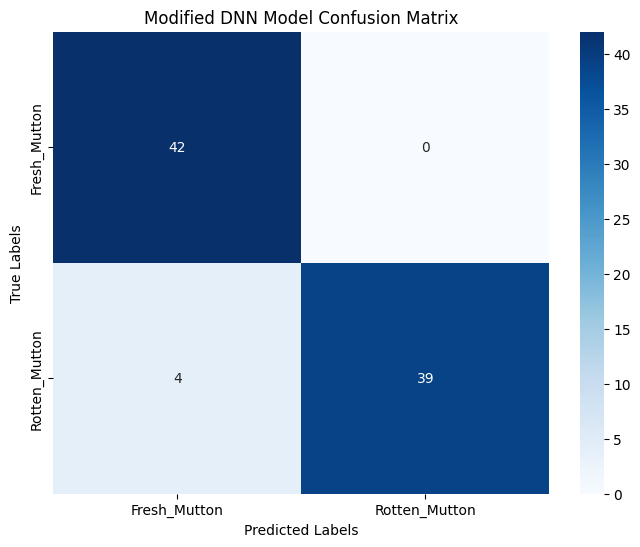

Modified DNN Model Classification Report:
               precision    recall  f1-score   support

 Fresh_Mutton       0.91      1.00      0.95        42
Rotten_Mutton       1.00      0.91      0.95        43

     accuracy                           0.95        85
    macro avg       0.96      0.95      0.95        85
 weighted avg       0.96      0.95      0.95        85



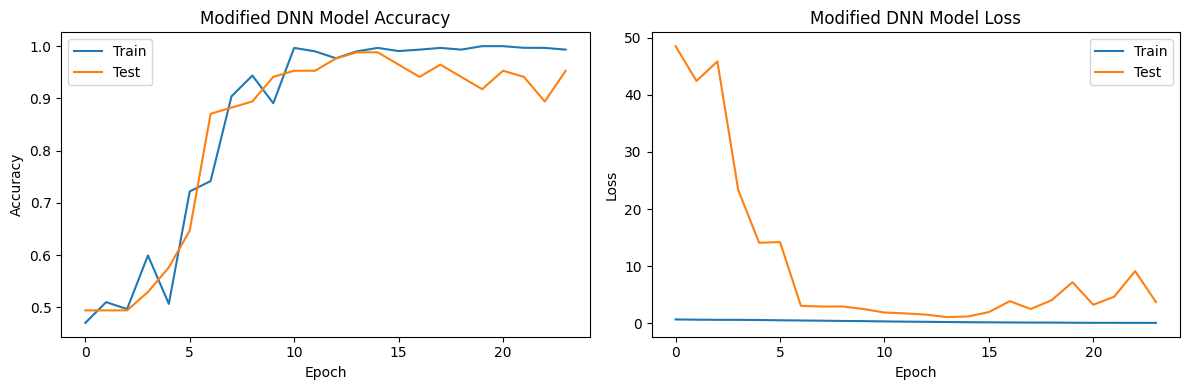

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    return data, labels_encoded, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/test"

train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path)
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path)

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Create a data generator for the training set
train_generator = datagen.flow(train_data, train_labels, batch_size=32, shuffle=True)

# Get the number of classes based on the unique labels in the training set
num_classes = len(np.unique(train_labels))

# Define the modified DNN model
dnn_model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Increasing dropout rate
    Dense(num_classes, activation='softmax')
])

# Compile the modified model with a smaller learning rate
dnn_model_modified.compile(optimizer=Adam(learning_rate=0.00001),  # Adjusted learning rate
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the modified DNN model with early stopping
dnn_history_modified = dnn_model_modified.fit(
    train_generator,
    steps_per_epoch=len(train_data) // 32,
    epochs=100,
    validation_data=(test_data, test_labels),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]  # Early stopping to prevent overfitting
)

# Evaluate the modified DNN model on the test set
dnn_test_loss_modified, dnn_test_acc_modified = dnn_model_modified.evaluate(test_data, test_labels)
print(f'Modified DNN Test Accuracy: {dnn_test_acc_modified}')

# Make predictions on the test set using the modified DNN model
dnn_predictions_modified = dnn_model_modified.predict(test_data)
dnn_predicted_labels_modified = np.argmax(dnn_predictions_modified, axis=1)

# Calculate confusion matrix for the modified DNN model
dnn_conf_matrix_modified = confusion_matrix(test_labels, dnn_predicted_labels_modified)

# Plot confusion matrix for the modified DNN model
plt.figure(figsize=(8, 6))
sns.heatmap(dnn_conf_matrix_modified, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Modified DNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score for the modified DNN model
dnn_report_modified = classification_report(test_labels, dnn_predicted_labels_modified, target_names=label_encoder.classes_)
print("Modified DNN Model Classification Report:")
print(dnn_report_modified)

# Plotting epoch-wise accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(dnn_history_modified.history['accuracy'], label='Train')
plt.plot(dnn_history_modified.history['val_accuracy'], label='Test')
plt.title('Modified DNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(dnn_history_modified.history['loss'], label='Train')
plt.plot(dnn_history_modified.history['val_loss'], label='Test')
plt.title('Modified DNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Class: Rotten_Mutton, Number of images: 170
Class: Fresh_Mutton, Number of images: 164
Class: Rotten_Mutton, Number of images: 43
Class: Fresh_Mutton, Number of images: 42
Epoch 1/100
10/10 [==============================] - 13s 606ms/step - loss: 0.6490 - accuracy: 0.4967 - val_loss: 29.5626 - val_accuracy: 0.4941
Epoch 2/100
10/10 [==============================] - 4s 419ms/step - loss: 0.6256 - accuracy: 0.4967 - val_loss: 46.7790 - val_accuracy: 0.4941
Epoch 3/100
10/10 [==============================] - 6s 523ms/step - loss: 0.6091 - accuracy: 0.5762 - val_loss: 9.5700 - val_accuracy: 0.6706
Epoch 4/100
10/10 [==============================] - 6s 566ms/step - loss: 0.5561 - accuracy: 0.6722 - val_loss: 14.6431 - val_accuracy: 0.6941
Epoch 5/100
10/10 [==============================] - 4s 411ms/step - loss: 0.5493 - accuracy: 0.6358 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 6s 582ms/step - loss: 0.4993 - accuracy: 0.8146 - va

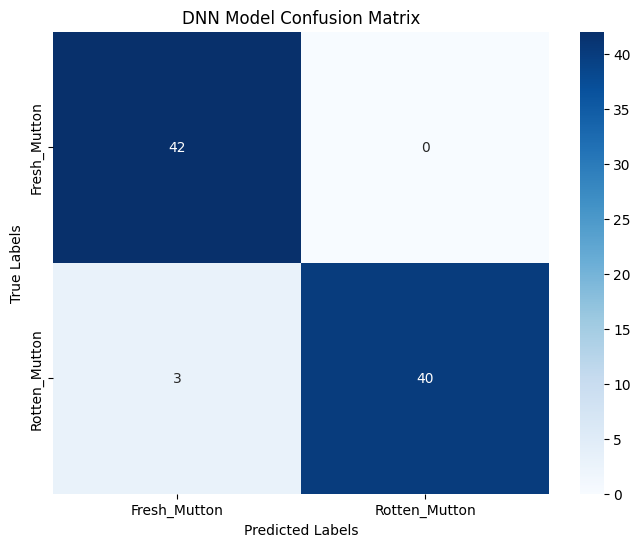

DNN Model Classification Report:
               precision    recall  f1-score   support

 Fresh_Mutton       0.93      1.00      0.97        42
Rotten_Mutton       1.00      0.93      0.96        43

     accuracy                           0.96        85
    macro avg       0.97      0.97      0.96        85
 weighted avg       0.97      0.96      0.96        85



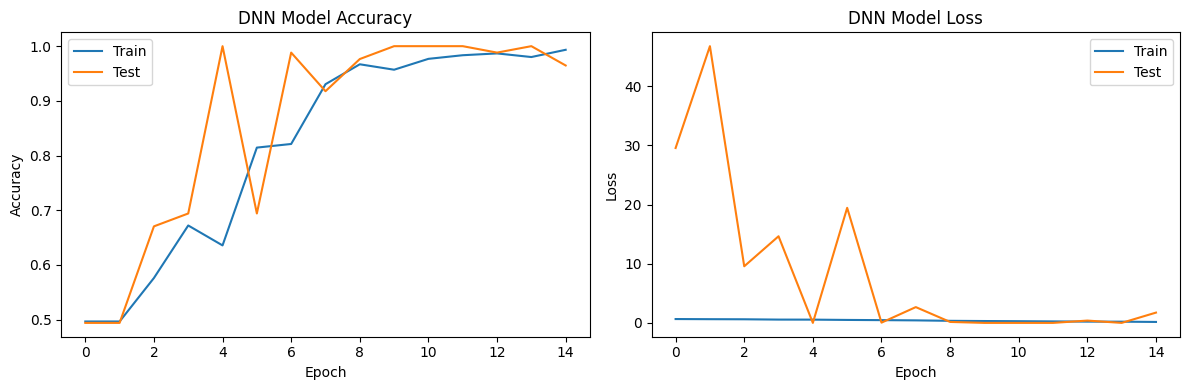

In [4]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    return data, labels_encoded, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/test"

train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path)
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path)

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Create a data generator for the training set
train_generator = datagen.flow(train_data, train_labels, batch_size=32, shuffle=True)

# Get the number of classes based on the unique labels in the training set
num_classes = len(np.unique(train_labels))

# Define the modified DNN model
dnn_model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Increasing dropout rate
    Dense(num_classes, activation='softmax')
])

# Compile the modified model with a smaller learning rate
dnn_model_modified.compile(optimizer=Adam(learning_rate=0.00001),  # Adjusted learning rate
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the modified DNN model with early stopping
dnn_history_modified = dnn_model_modified.fit(
    train_generator,
    steps_per_epoch=len(train_data) // 32,
    epochs=100,
    validation_data=(test_data, test_labels),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]  # Early stopping to prevent overfitting
)

# Evaluate the modified DNN model on the test set
dnn_test_loss_modified, dnn_test_acc_modified = dnn_model_modified.evaluate(test_data, test_labels)
print(f'DNN Test Accuracy: {dnn_test_acc_modified}')

# Make predictions on the test set using the modified DNN model
dnn_predictions_modified = dnn_model_modified.predict(test_data)
dnn_predicted_labels_modified = np.argmax(dnn_predictions_modified, axis=1)

# Calculate confusion matrix for the modified DNN model
dnn_conf_matrix_modified = confusion_matrix(test_labels, dnn_predicted_labels_modified)

# Plot confusion matrix for the modified DNN model
plt.figure(figsize=(8, 6))
sns.heatmap(dnn_conf_matrix_modified, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('DNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score for the modified DNN model
dnn_report_modified = classification_report(test_labels, dnn_predicted_labels_modified, target_names=label_encoder.classes_)
print("DNN Model Classification Report:")
print(dnn_report_modified)

# Plotting epoch-wise accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(dnn_history_modified.history['accuracy'], label='Train')
plt.plot(dnn_history_modified.history['val_accuracy'], label='Test')
plt.title('DNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(dnn_history_modified.history['loss'], label='Train')
plt.plot(dnn_history_modified.history['val_loss'], label='Test')
plt.title('DNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Mutton Quality Classification using KNN

Class: Rotten_Mutton, Number of images: 170
Class: Fresh_Mutton, Number of images: 164
Class: Rotten_Mutton, Number of images: 43
Class: Fresh_Mutton, Number of images: 42
KNN Test Accuracy: 0.9882352941176471
Confusion Matrix:
[[41  1]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

 Fresh_Mutton       1.00      0.98      0.99        42
Rotten_Mutton       0.98      1.00      0.99        43

     accuracy                           0.99        85
    macro avg       0.99      0.99      0.99        85
 weighted avg       0.99      0.99      0.99        85

KNN Evaluation metrics saved at: /content/drive/MyDrive/Trained model/Meat Classification/KNN/Iteration 2 KNN/evaluation_metrics.txt


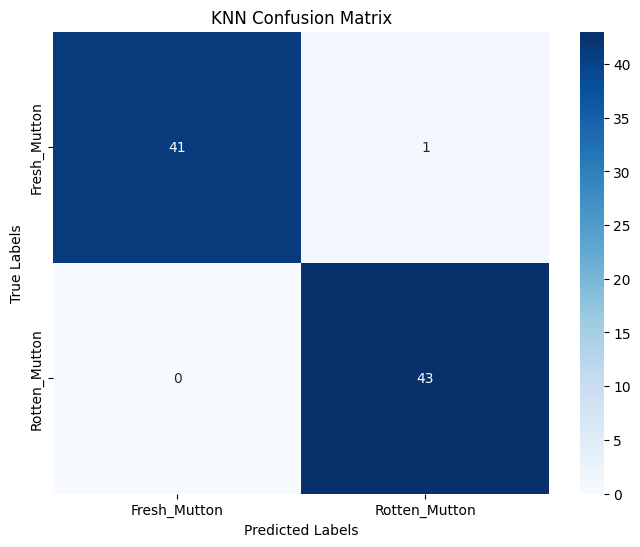

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(112, 112)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, image_size)
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    data_flatten = data.reshape((data.shape[0], -1))

    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    return data_flatten, labels_encoded, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Mutton Quality Classification/test"

train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path)
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path)

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
# You can experiment with different values of n_neighbors, weights, and metric

# Train the KNN model
knn_model.fit(train_data, train_labels)

# Make predictions on the test set
knn_predictions = knn_model.predict(test_data)

# Evaluate the KNN model on the test set
accuracy = accuracy_score(test_labels, knn_predictions)
conf_matrix = confusion_matrix(test_labels, knn_predictions)
report = classification_report(test_labels, knn_predictions, target_names=label_encoder.classes_)

print(f'KNN Test Accuracy: {accuracy}')
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
knn_model_save_path = "/content/drive/MyDrive/Trained model/Mutton Quality Classification/KNN/Iteration 2 KNN"
knn_evaluation_file_path = os.path.join(knn_model_save_path, "evaluation_metrics.txt")

os.makedirs(os.path.dirname(knn_evaluation_file_path), exist_ok=True)

with open(knn_evaluation_file_path, "w") as file:
    file.write(f'KNN Test Accuracy: {accuracy}\n\n')
    file.write("KNN Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("KNN Classification Report:\n")
    file.write(report + "\n\n")

print(f'KNN Evaluation metrics saved at: {knn_evaluation_file_path}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
